In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
y_train[0]

5

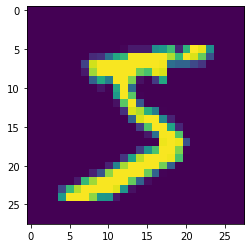

In [9]:
plt.imshow(X_train[0])
plt.show()

In [10]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(y[index])
    plt.show()

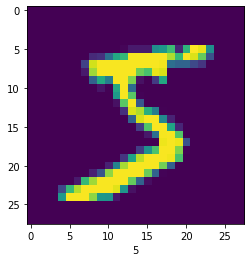

In [12]:
plot_sample(X_train,y_train,0)

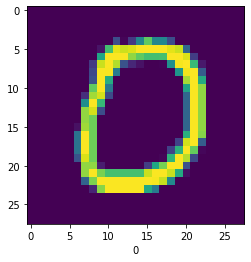

In [13]:
plot_sample(X_test,y_test,10)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
X_train.shape

(60000, 28, 28)

In [54]:
cnn=models.Sequential([
    layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [55]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

In [56]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2005 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0702 - accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0427 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0203 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0170 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 27s 15m

In [57]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0376 - accuracy: 0.9881


[0.03759101405739784, 0.988099992275238]

In [59]:
yp=cnn.predict(X_test)
yp[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.49277957e-09, 4.70498884e-09, 3.64328997e-07, 3.47280007e-07,
        6.44754694e-10, 1.85724147e-09, 4.53883621e-15, 9.99998212e-01,
        6.12555701e-11, 1.02580179e-06],
       [2.39121934e-11, 1.28552913e-09, 1.00000000e+00, 5.86284696e-14,
        7.08011494e-16, 3.62486982e-16, 3.44866475e-12, 8.88571019e-15,
        1.41872386e-12, 9.97871382e-13],
       [8.57311509e-13, 1.00000000e+00, 1.30097710e-10, 5.30775693e-17,
        1.83556974e-08, 1.14643205e-10, 1.77948789e-09, 2.56429225e-08,
        2.48829446e-09, 1.01421510e-10],
       [9.99847531e-01, 1.11728595e-12, 5.66869254e-08, 1.56810138e-11,
        2.17971930e-07, 4.04323286e-09, 1.47879793e-04, 5.76546666e-12,
        1.78263484e-08, 4.30182581e-06],
       [2.20849250e-12, 1.54695510e-08, 4.90983831e-09, 6.90013042e-13,
        9.99999881e-01, 8.75529510e-11, 2.79451360e-08, 1.21600798e-12,
        3.86478849e-09, 1.13958265e-07]], dtype=float32)

In [61]:
y_pred=[np.argmax(element) for element in yp]

In [62]:
y_pred[:5]

[7, 2, 1, 0, 4]

In [63]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [65]:
print(confusion_matrix(y_test,y_pred))

[[ 974    0    1    0    1    1    1    2    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    1 1026    0    1    0    0    3    0    0]
 [   0    0    2 1002    0    5    0    0    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    4    0  883    1    0    1    2]
 [   3    4    0    1    2    6  942    0    0    0]
 [   0    4    9    0    6    0    0  998    1   10]
 [   3    0    4    1    3    3    0    0  955    5]
 [   0    3    1    0   12    3    1    1    0  988]]


In [67]:
cm=confusion_matrix(y_test,y_pred)

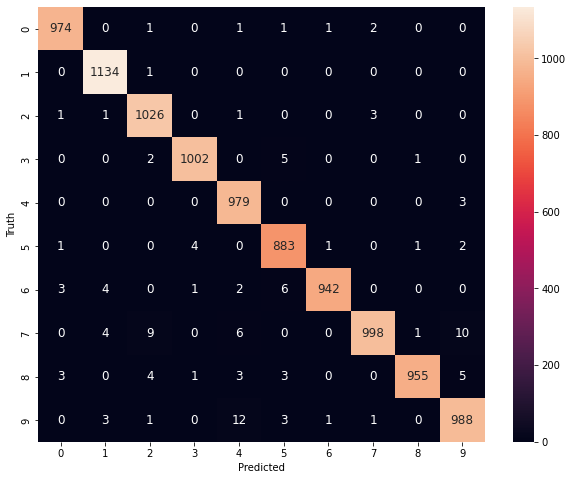

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,annot_kws={'size':12},fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

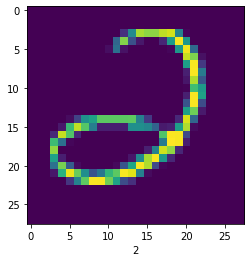

In [72]:
plot_sample(X_test,y_test,1050)

In [73]:
y_pred[1050]

2